In [56]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
#Q1 - Dataset Overview

df = pd.read_csv("C:/Users/shant/Downloads/archive/Sleep_health_and_lifestyle_dataset.csv")

print("---- First 5 Rows ----")
print(df.head(), "\n")

---- First 5 Rows ----
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         1

In [58]:
print("---- Last 5 Rows ----")
print(df.tail(), "\n")

---- Last 5 Rows ----
     Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000  

In [59]:
print("Shape of the dataset:", df.shape)

print("\nList of Columns:")
print(df.columns.tolist())

print("\nData Types of Each Feature:")
print(df.dtypes)

Shape of the dataset: (374, 13)

List of Columns:
['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

Data Types of Each Feature:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [60]:
print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nNumber of Unique Values per Column:")
print(df.nunique())


Missing Values per Column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Number of Unique Values per Column:
Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64


In [61]:
#Q2 - Data Quality Checks 
print("---- Missing Values ----")
print(df.isnull().sum(), "\n")

duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
if not duplicates.empty:
    print("\nDuplicate rows preview:")
    print(duplicates.head(), "\n")

---- Missing Values ----
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64 

Number of duplicate rows: 0


In [62]:
#erroneous data checks
if 'Age' in df.columns:
    invalid_ages = df[df['Age'] < 0]
    print(f"Invalid age entries (<0): {invalid_ages.shape[0]}")
    if not invalid_ages.empty:
        print(invalid_ages[['Age']], "\n")

if 'Sleep Duration' in df.columns:
    invalid_sleep = df[(df['Sleep Duration'] <= 0) | (df['Sleep Duration'] > 24)]
    print(f"Unrealistic sleep duration entries: {invalid_sleep.shape[0]}")

if 'Stress Level' in df.columns:
    invalid_stress = df[~df['Stress Level'].between(0, 10)]
    print(f"Out-of-range stress levels: {invalid_stress.shape[0]}")

print("\n")

df.columns = df.columns.str.strip()
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    df[col] = df[col].str.strip()
    df[col] = df[col].str.title()

print("Formatting issues fixed (spaces removed, text standardized).")

Invalid age entries (<0): 0
Unrealistic sleep duration entries: 0
Out-of-range stress levels: 0


Formatting issues fixed (spaces removed, text standardized).


In [63]:
print("\nUnique categorical values after cleaning:")
for col in obj_cols:
    print(f"{col}: {df[col].unique()}")


Unique categorical values after cleaning:
Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']


In [64]:
#Q3 - Data Cleaning
print("---- Handling Missing Data ----")
print("Missing values before cleaning:")
print(df.isnull().sum(), "\n")

df.dropna(inplace=True)
print("Null values dropped successfully.\n")

before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.\n")

if 'Age' in df.columns:
    df = df[df['Age'] >= 0] 
if 'Sleep Duration' in df.columns:
    df = df[(df['Sleep Duration'] > 0) & (df['Sleep Duration'] <= 24)]
if 'Stress Level' in df.columns:
    df = df[df['Stress Level'].between(0, 10)]
print("Incorrect values handled successfully.\n")


df.columns = df.columns.str.strip().str.title()
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    df[col] = df[col].str.strip().str.title()
print("Formatting standardized (column names + text cleaned).")

---- Handling Missing Data ----
Missing values before cleaning:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64 

Null values dropped successfully.

Removed 0 duplicate rows.

Incorrect values handled successfully.

Formatting standardized (column names + text cleaned).


In [65]:
print("\nCleaned Data Overview:")
print(df.info())
print("\nRemaining missing values:")
print(df.isnull().sum())


Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 3 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person Id                155 non-null    int64  
 1   Gender                   155 non-null    object 
 2   Age                      155 non-null    int64  
 3   Occupation               155 non-null    object 
 4   Sleep Duration           155 non-null    float64
 5   Quality Of Sleep         155 non-null    int64  
 6   Physical Activity Level  155 non-null    int64  
 7   Stress Level             155 non-null    int64  
 8   Bmi Category             155 non-null    object 
 9   Blood Pressure           155 non-null    object 
 10  Heart Rate               155 non-null    int64  
 11  Daily Steps              155 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 17.0+ KB
Non

In [66]:
#Q4 - Descriptive Statistics

print("---- Basic Descriptive Statistics ----")
display(df.describe())

---- Basic Descriptive Statistics ----


,Person Id,Age,Sleep Duration,Quality Of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,244.761290,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452
std,91.282997,7.839311,0.773534,1.337325,20.634158,1.946757,5.187381,1893.921881
min,4.000000,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,199.500000,43.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,255.000000,45.000000,6.500000,7.000000,45.000000,7.000000,72.000000,6000.000000
75%,304.500000,51.000000,7.400000,8.000000,75.000000,7.000000,75.000000,7000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [67]:
# --- 3️⃣ Mean, Median, Mode for Numeric Columns ---
numeric_cols = df.select_dtypes(include=np.number).columns

print("\n---- Mean, Median, Mode ----")
for col in numeric_cols:
    print(f"\n📈 {col}:")
    print(f"Mean   : {df[col].mean():.2f}")
    print(f"Median : {df[col].median():.2f}")
    print(f"Mode   : {df[col].mode()[0]}")


---- Mean, Median, Mode ----

📈 Person Id:
Mean   : 244.76
Median : 255.00
Mode   : 4

📈 Age:
Mean   : 46.63
Median : 45.00
Mode   : 44

📈 Sleep Duration:
Mean   : 6.81
Median : 6.50
Mode   : 6.5

📈 Quality Of Sleep:
Mean   : 6.87
Median : 7.00
Mode   : 6

📈 Physical Activity Level:
Mean   : 60.90
Median : 45.00
Mode   : 45

📈 Stress Level:
Mean   : 5.77
Median : 7.00
Mode   : 7

📈 Heart Rate:
Mean   : 71.79
Median : 72.00
Mode   : 72

📈 Daily Steps:
Mean   : 6765.81
Median : 6000.00
Mode   : 6000


In [68]:
print("\n---- Minimum & Maximum Values ----")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

print("\n---- Variance & Standard Deviation ----")
for col in numeric_cols:
    print(f"{col}: Var = {df[col].var():.2f}, Std = {df[col].std():.2f}")


---- Minimum & Maximum Values ----
Person Id: Min = 4, Max = 374
Age: Min = 28, Max = 59
Sleep Duration: Min = 5.8, Max = 8.3
Quality Of Sleep: Min = 4, Max = 9
Physical Activity Level: Min = 30, Max = 90
Stress Level: Min = 3, Max = 8
Heart Rate: Min = 65, Max = 86
Daily Steps: Min = 3000, Max = 10000

---- Variance & Standard Deviation ----
Person Id: Var = 8332.59, Std = 91.28
Age: Var = 61.45, Std = 7.84
Sleep Duration: Var = 0.60, Std = 0.77
Quality Of Sleep: Var = 1.79, Std = 1.34
Physical Activity Level: Var = 425.77, Std = 20.63
Stress Level: Var = 3.79, Std = 1.95
Heart Rate: Var = 26.91, Std = 5.19
Daily Steps: Var = 3586940.09, Std = 1893.92


In [69]:
print("\n---- Skewness & Kurtosis ----")
for col in numeric_cols:
    print(f"{col}: Skewness = {df[col].skew():.2f}, Kurtosis = {df[col].kurt():.2f}")

print("\n---- Value Counts (Categorical Data) ----")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n *  {col}:")
    print(df[col].value_counts())


---- Skewness & Kurtosis ----
Person Id: Skewness = -0.90, Kurtosis = 0.56
Age: Skewness = -0.32, Kurtosis = -0.05
Sleep Duration: Skewness = 0.78, Kurtosis = -0.90
Quality Of Sleep: Skewness = 0.34, Kurtosis = -0.62
Physical Activity Level: Skewness = 0.24, Kurtosis = -1.51
Stress Level: Skewness = -0.28, Kurtosis = -1.60
Heart Rate: Skewness = 0.74, Kurtosis = 0.30
Daily Steps: Skewness = 0.42, Kurtosis = -0.37

---- Value Counts (Categorical Data) ----

 *  Gender:
Gender
Female    103
Male       52
Name: count, dtype: int64

 *  Occupation:
Occupation
Nurse                   64
Teacher                 31
Salesperson             30
Doctor                   7
Accountant               7
Engineer                 6
Lawyer                   5
Sales Representative     2
Scientist                2
Software Engineer        1
Name: count, dtype: int64

 *  Bmi Category:
Bmi Category
Overweight       129
Normal            12
Obese             10
Normal Weight      4
Name: count, dtype: int64

In [70]:
#Q5 - Data Transformation & Encoding
num_cols = df.select_dtypes(include=np.number).columns

#Using StandardScaler() function
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])

#Using MinMaxScaler
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = scaler_mm.fit_transform(df_mm[num_cols])
print("Numeric data scaled successfully (Standard & Min-Max versions created).\n")

cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", list(cat_cols), "\n")

#for Label Encoding
label_encoder = LabelEncoder()
df_label = df.copy()
for col in cat_cols:
    df_label[col] = label_encoder.fit_transform(df_label[col])
print("Label encoding applied (df_label created).\n")

#for One-Hot Encoding
df_ohe = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("One-hot encoding applied (df_ohe created).\n")

print("Original dataset shape:", df.shape)
print("Label-encoded dataset shape:", df_label.shape)
print("One-hot encoded dataset shape:", df_ohe.shape)

Numeric data scaled successfully (Standard & Min-Max versions created).

Categorical columns: ['Gender', 'Occupation', 'Bmi Category', 'Blood Pressure', 'Sleep Disorder'] 

Label encoding applied (df_label created).

One-hot encoding applied (df_ohe created).

Original dataset shape: (155, 13)
Label-encoded dataset shape: (155, 13)
One-hot encoded dataset shape: (155, 35)


Numeric Columns: ['Person Id', 'Age', 'Sleep Duration', 'Quality Of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Outliers detected (by IQR method):
Person Id                   9
Age                         9
Sleep Duration              0
Quality Of Sleep            0
Physical Activity Level     0
Stress Level                0
Heart Rate                  2
Daily Steps                45
dtype: int64

Outliers detected (Z-score > 3):
0


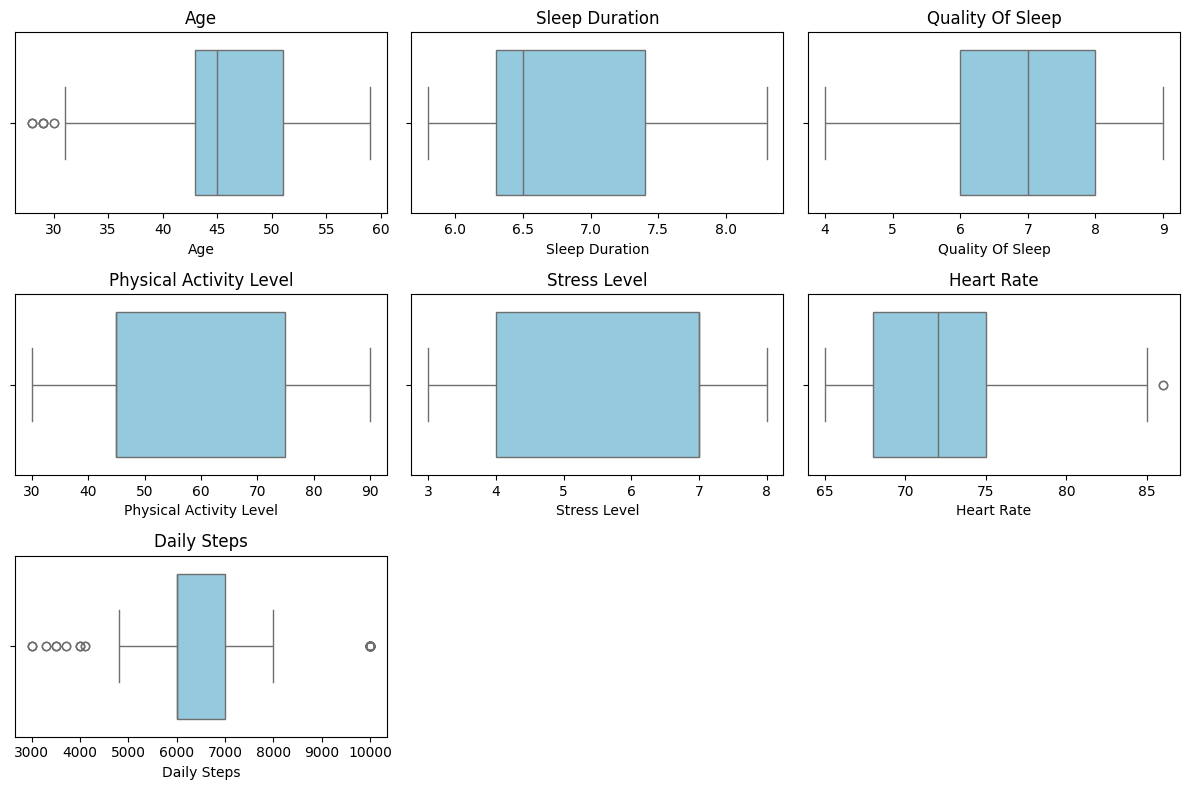


Outlier treatment completed using capping(with IQR method).


In [71]:
#Q6 - Outlier Detection & Treatment

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Columns:", numeric_cols)

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected (by IQR method):")
print(outliers_iqr.sum())


z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_z = (z_scores > 3)
print("\nOutliers detected (Z-score > 3):")
print(outliers_z.sum())

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[1:], 1):  # skip Person ID
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nOutlier treatment completed using capping(with IQR method).")

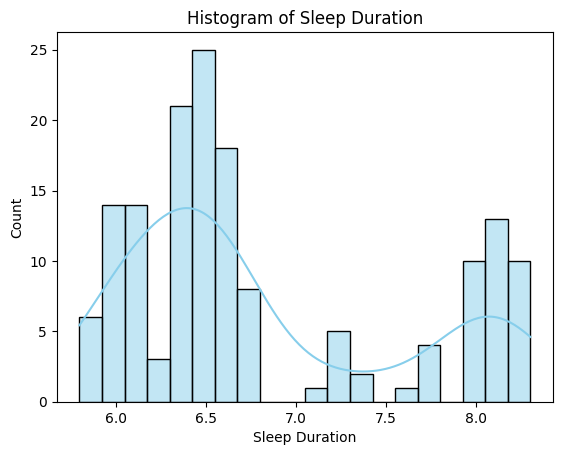

In [72]:
#Q7 - Data Visualization
#Univariete analysis
#Histogram
sns.histplot(df["Sleep Duration"], kde=True, bins=20, color='skyblue')
plt.title("Histogram of Sleep Duration")
plt.show()

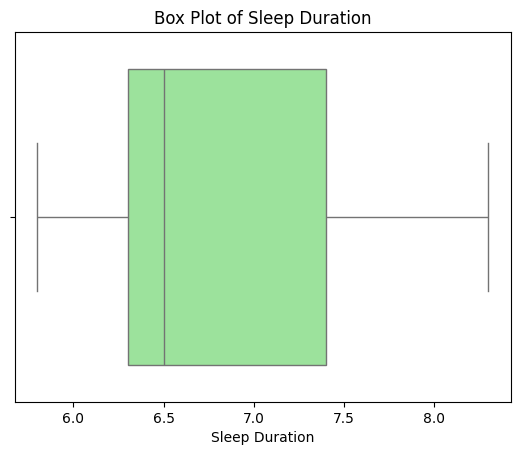

In [73]:
#Box Plot
sns.boxplot(x=df["Sleep Duration"], color='lightgreen')
plt.title("Box Plot of Sleep Duration")
plt.show()

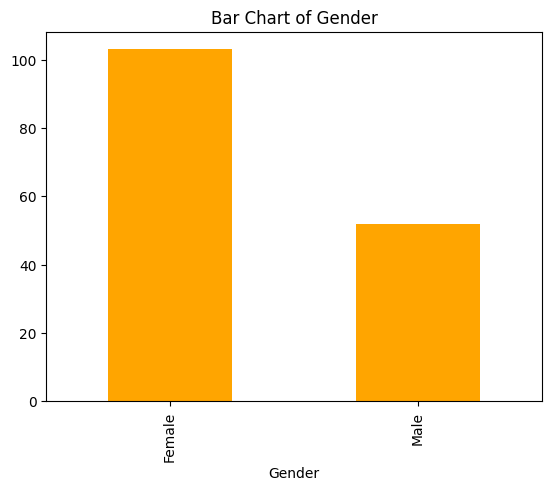

In [74]:
#Bar Chart
df["Gender"].value_counts().plot(kind='bar', color='orange')
plt.title("Bar Chart of Gender")
plt.show()

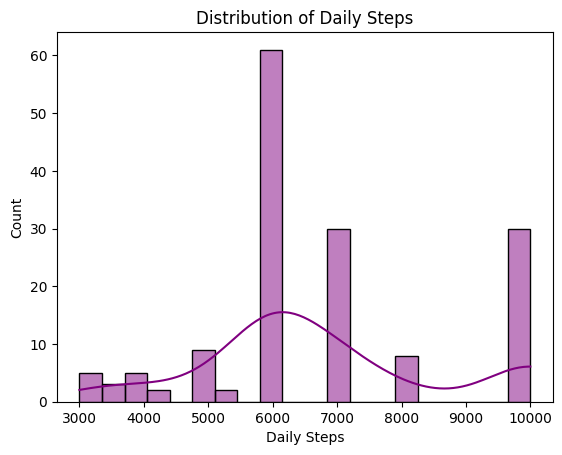

In [75]:
#Distribution Plot
sns.histplot(df["Daily Steps"], kde=True, color='purple', bins=20)
plt.title("Distribution of Daily Steps")
plt.show()

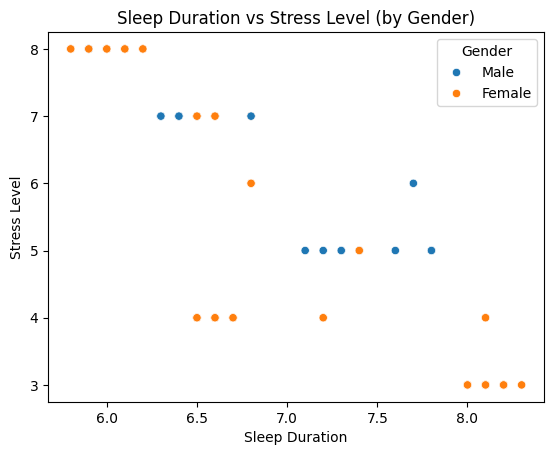

In [76]:
#Bivariate data
#Scatter Plot
sns.scatterplot(x="Sleep Duration", y="Stress Level", hue="Gender", data=df)
plt.title("Sleep Duration vs Stress Level (by Gender)")
plt.show()

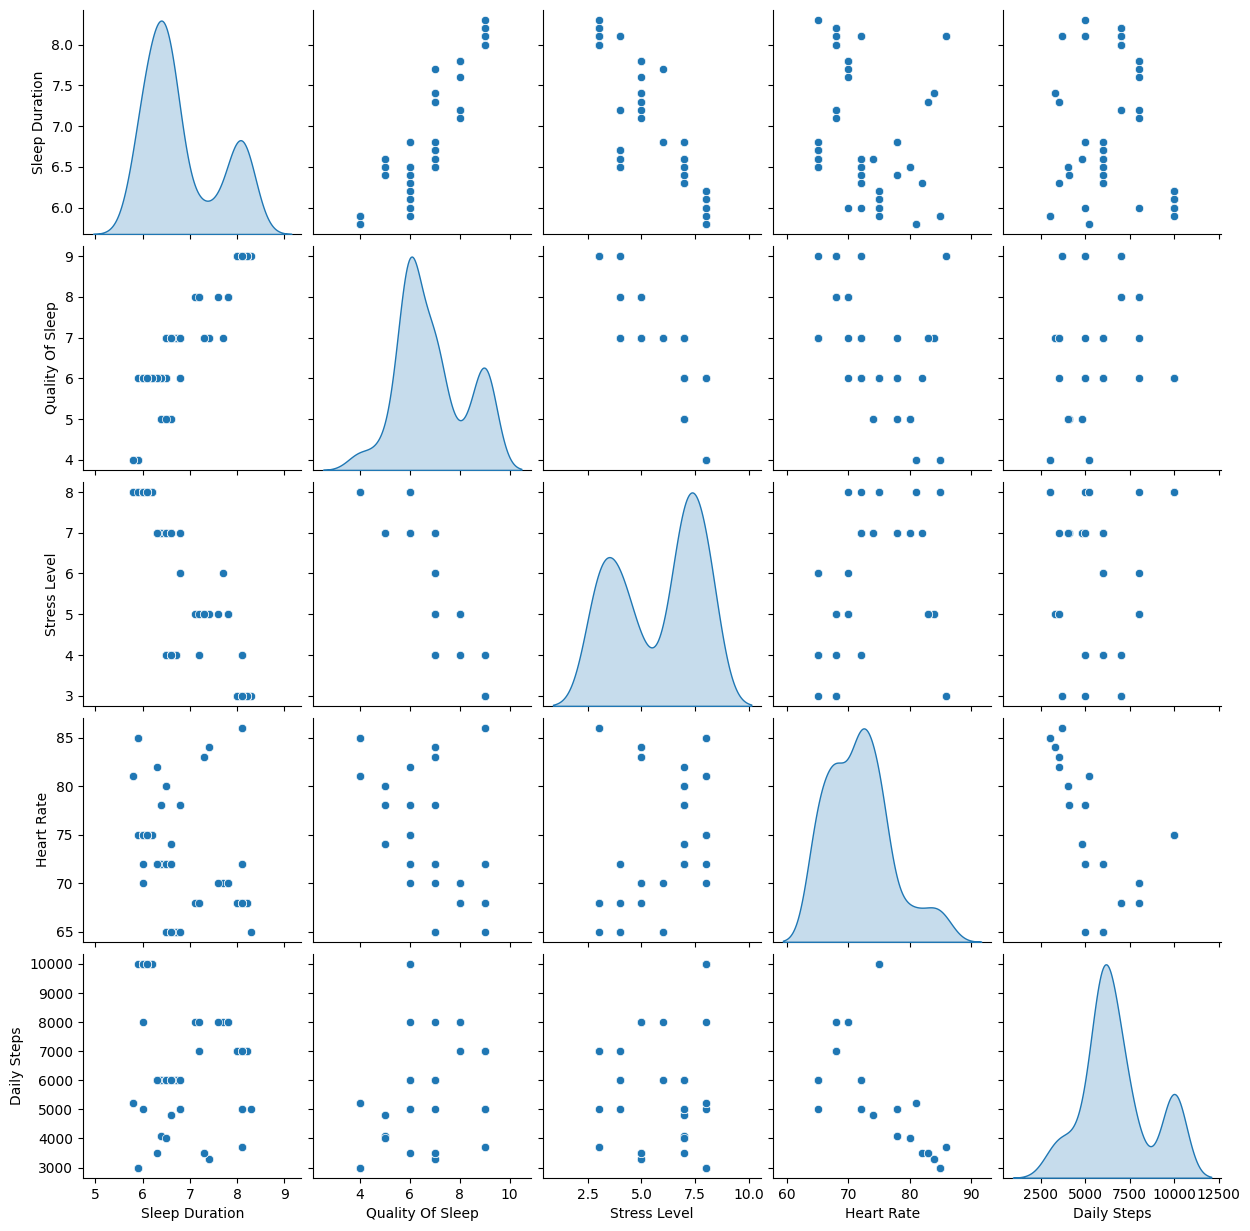

In [77]:
#Pair Plot
sns.pairplot(df[["Sleep Duration", "Quality Of Sleep", "Stress Level", "Heart Rate", "Daily Steps"]],diag_kind="kde")
plt.show()

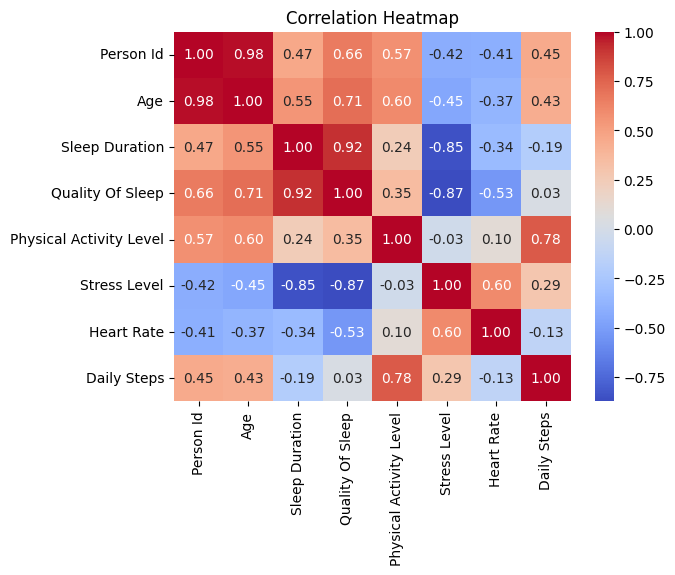

In [78]:
#Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

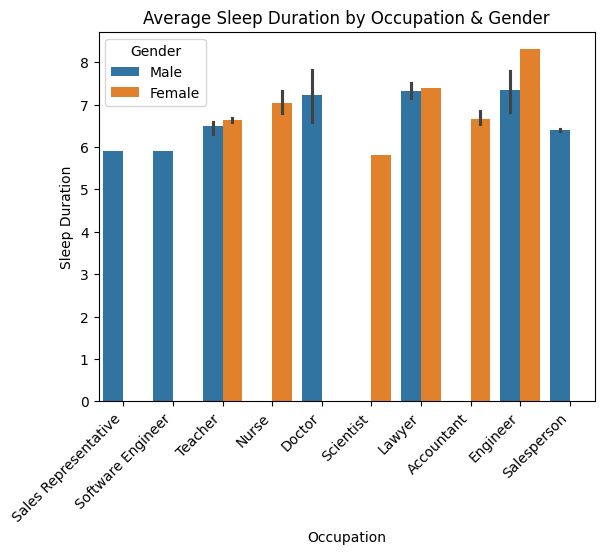

In [79]:
#Grouped Bar Chart
sns.barplot(x="Occupation", y="Sleep Duration", hue="Gender", data=df)
plt.title("Average Sleep Duration by Occupation & Gender")
plt.xticks(rotation=45, ha='right')
plt.show()

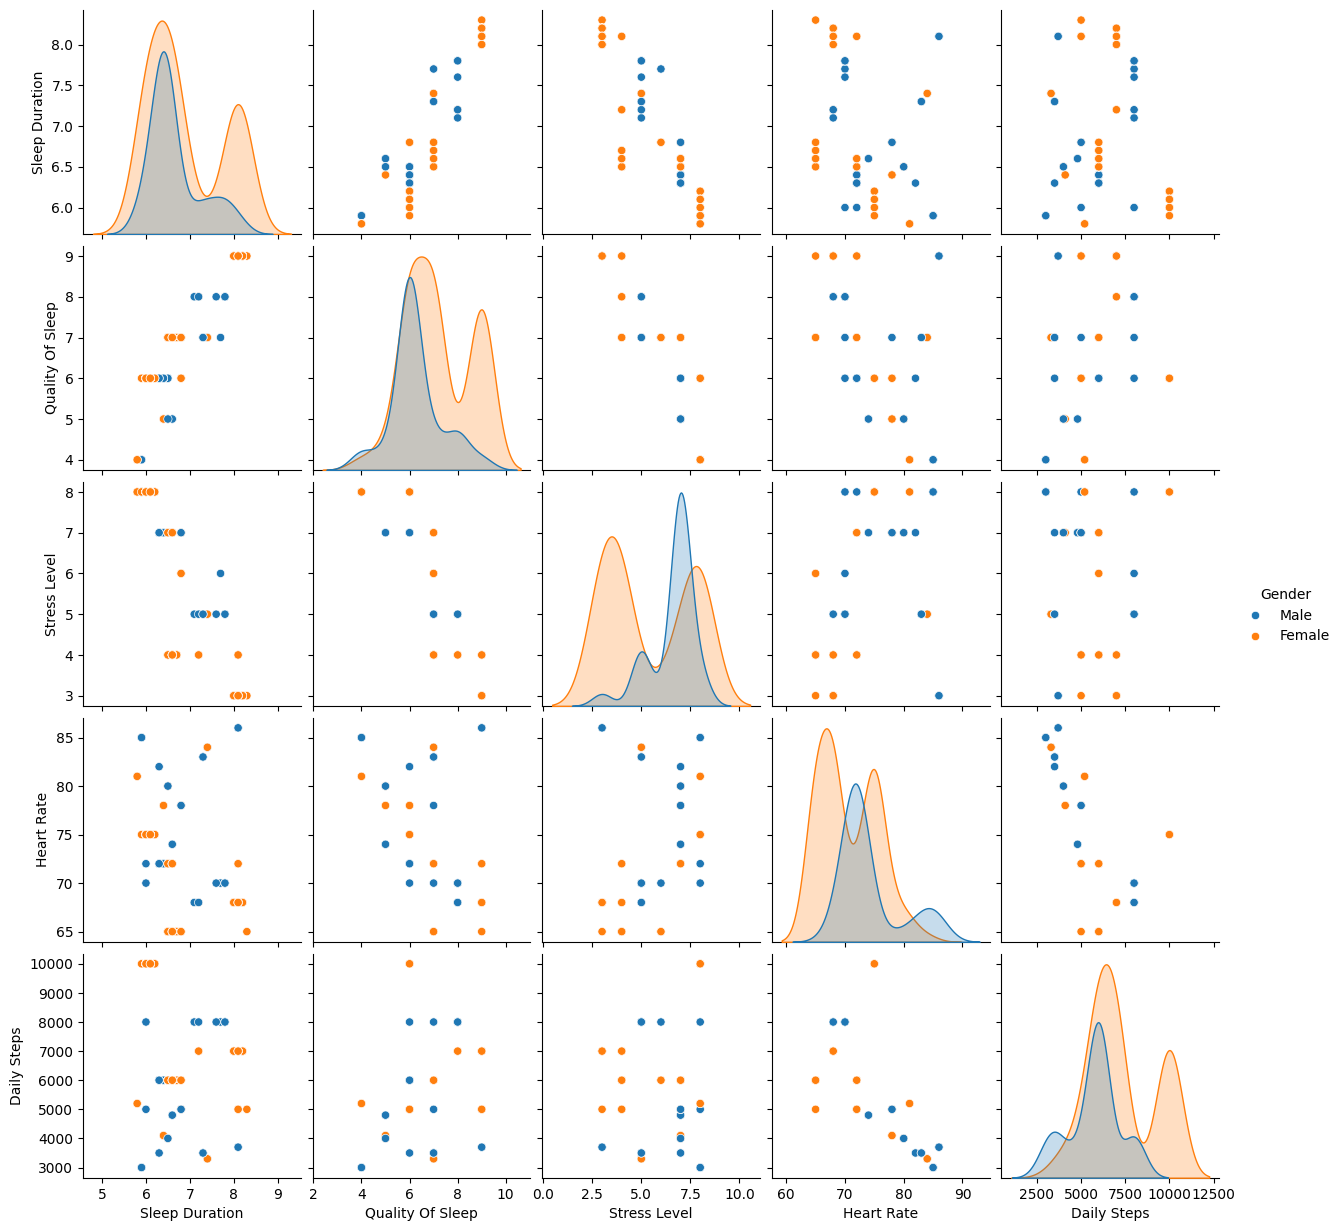

In [80]:
#Q8 - Multivariate Analysis
#Pairplot with hue=gender
sns.pairplot(df[["Sleep Duration", "Quality Of Sleep", "Stress Level", "Heart Rate", "Daily Steps", "Gender"]],hue="Gender",diag_kind="kde")
plt.show()

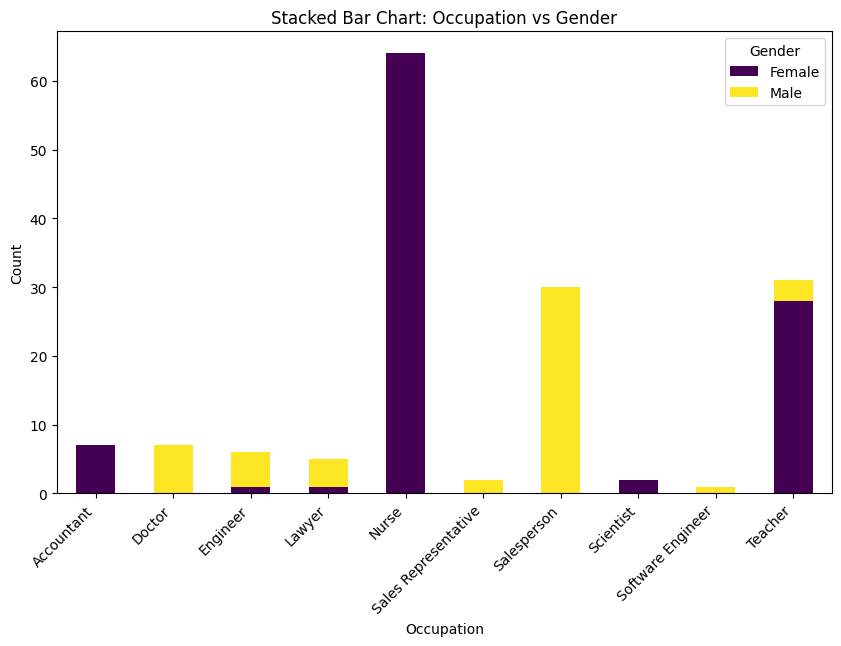

In [81]:
#Stacked Bar Chart: Occupation vs Gender
occupation_gender = pd.crosstab(df["Occupation"], df["Gender"])

occupation_gender.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Stacked Bar Chart: Occupation vs Gender")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.show()